# [Machine Learning](https://frolovilya.github.io/machine-learning/) / Anomaly Detection

> See sources
> * [anomaly_detection.py](https://github.com/frolovilya/machine-learning/blob/master/anomaly_detection.py)

Detecting anomalies in data by fitting dataset to a normal (Gaussian) distribution with corresponding mean $\mu$ and variance $\sigma^2$.

Given that $X = \{x^{(0)}, \dots, x^{(m)}\}$ and each $x^{(j)} \in R^n$

$$\mu_i = \frac{1}{m} \sum_{j = 0}^{m} x^{(j)}_i$$

$$\sigma^2_i = \frac{1}{m} \sum_{j = 0}^{m}(\mu_i - x^{(j)}_i)^2$$

## Probability Distribution

Use distribution parameters to calculate Gaussian probability distribution for feature $x_i$:

$$p(x_i, \mu_i, \sigma^2_i) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{(x - \mu)^2}{2 \sigma^2}}$$

Total probability distribution for feature vector $x$ is defined as a product of individual $x_i$ feature probabilties:
 
$$p(x) = \prod_{i = 0}^{n} p(x_i, \mu_i, \sigma^2_i)$$

## Multivariate Probability Distribution

Alternatively, $p(x)$ can be calculated using covariance matrix:

$$\Sigma = \frac{1}{m} \sum_{j = 0}^{m} (x^{(j)} - \mu^{(j)}) (x^{(j)} - \mu^{(j)})^T$$

This matrix captures covariances between $x$ vector individual features $x_i$.

$$p(x) = \frac{1}{(2 \pi)^{n/2} |\Sigma|^{1/2}} \exp(- \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu))$$

Where $|\Sigma|$ is a convariance matrix determinant and $\Sigma^{-1}$ inverse matrix.

In [1]:
# import libs
import sys
sys.path.append("../")

from anomaly_detection import *
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import math

In [2]:
# load data
def load_performmance_data():
    return scipy.io.loadmat('../data/ex8data1.mat')


performance_data = load_performmance_data()
x = performance_data['X']
x_cv = performance_data['Xval']
y_cv = performance_data['yval']
print(x.shape)

(307, 2)


In [3]:
# calculate distribution parameters
x_mean = get_mean(x)
print("Mean: \n", x_mean)
x_cov = get_covariance(x)
print("Covariance matrix: \n", x_cov)

Mean: 
 [14.11222578 14.99771051]
Covariance matrix: 
 [[ 1.83263141 -0.22712233]
 [-0.22712233  1.70974533]]


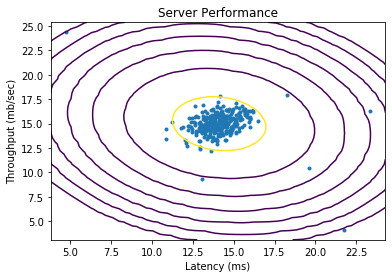

In [4]:
# plot data
def plot_performance_data():
    plt.scatter(x[:,0], x[:,1], marker=".")
    plt.xlabel("Latency (ms)")
    plt.ylabel("Throughput (mb/sec)")
    plt.title("Server Performance")

    
def plot_probability_contours():
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = get_multivariate_probability(xy, x_mean, x_cov).reshape(XX.shape)
    ax.contour(XX, YY, Z, levels=[math.pow(10, i) for i in range(-20, 0, 3)])
    
    
plot_performance_data() 
plot_probability_contours()
plt.show()

## Anomaly Treshold

By selecting treshold $\epsilon$, the given example $x$ can be classified as anomaly if:

$$p(x) < \epsilon$$

### Find threshold using $F_1$ score

$F_1$ score measures test accuracy:

$$F_1 = \frac{2 \cdot prec \cdot rec}{prec + rec}$$


Where $prec$ is a precision - how many results are accurate? 

$tp$ - true positive, $fp$ - false positive.

$$prec = \frac{tp}{tp + fp}$$


And $rec$ is a recall - how many true posivite items selected?

$fn$ - false negative.

$$rec = \frac{tp}{tp + fn}$$


In [5]:
# find threshold which gives the maximum F1 score
p_cv = get_multivariate_probability(x_cv, x_mean, x_cov)
threshold, score = select_threshold(p_cv, y_cv)
print("Threshold:", threshold, "\nF1 score:", score)

Threshold: 9.074844572965702e-05 
F1 score: 0.8235293536332209


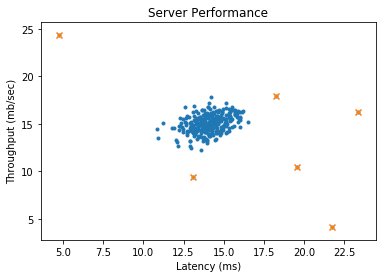

In [7]:
# plot data with anomalies
def plot_anomalies(x, p, threshold):
    plt.scatter(x[p < threshold, 0], x[p < threshold, 1], marker="x")

p = get_multivariate_probability(x, x_mean, x_cov)
plot_performance_data()
plot_anomalies(x, p, threshold)
plt.show()